In [ ]:
! pip install -q langgraph langchain-core langchain-community langchain-openai

In [4]:
from typing_extensions import TypedDict, Annotated
from IPython.display import display, Image
from langgraph.graph import StateGraph, START, END
from langchain_core.prompts import PromptTemplate
from langchain_openai import ChatOpenAI
from langgraph.graph.message import add_messages
from google.colab import userdata
import os

In [5]:
OPENAI_API_KEY = userdata.get('OPENAI_API_KEY')
os.environ['OPENAI_API_KEY'] = OPENAI_API_KEY

In [6]:
class State(TypedDict):
    messages: Annotated[list,add_messages]

In [11]:
def generate_user_stories(state:State):
    user_story_prompt = """
    You are an expert Agile product owner specializing in user story generation. Your goal is to create well-structured user stories
    that align with Agile best practices and ensure clarity for development teams. Each user story must adhere to the following:

    - Clearly define the user role.
    - Describe the action or feature the user needs.
    - Specify the benefit or reason behind the feature.
    - Include three to five well-defined acceptance criteria.
    - Ensure that the user stories are clear, concise, and aligned with Agile methodologies.

    **Project Details:**
    - Project Name: project_name
    - Project Description: project_description
    - Key Features & Requirements:
    features

    **Deliverables:**
    Generate at least one user story per key feature, ensuring:
    - The stories follow the standard format: "As a [user role], I want [feature or action] so that [benefit or reason]."
    - Each story has 3-5 acceptance criteria, formatted with bullet points.
    - If applicable, include edge cases or dependencies.

    Please generate the structured user stories below:
    """

    llm = ChatOpenAI(model="gpt-4o")
    return {"messages":[llm.invoke([user_story_prompt]+state["messages"])]}

In [12]:
builder = StateGraph(State)

builder.add_node("generate_user_stories",generate_user_stories)

builder.add_edge(START,"generate_user_stories")
builder.add_edge("generate_user_stories",END)

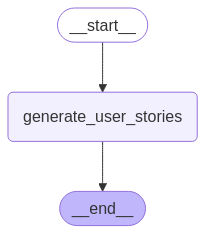

In [13]:
graph = builder.compile()
display(Image(graph.get_graph().draw_mermaid_png()))

In [15]:
# Define the initial state with project details
initial_state = {
    "messages": [
        {
            "role": "system",
            "content": """
            Project Name: Smart Legal Assistant
            Project Description: A chatbot that provides legal assistance by retrieving relevant Indian laws and case precedents.
            Key Features:
            - Natural Language Processing for legal queries
            - Retrieval of relevant statutes and case laws
            - Multilingual support for Indian languages
            - Document generation for legal drafts
            """
        }
    ]
}

# Invoke the workflow
result = graph.invoke(initial_state)

{'messages': [SystemMessage(content='\n            Project Name: Smart Legal Assistant\n            Project Description: A chatbot that provides legal assistance by retrieving relevant Indian laws and case precedents.\n            Key Features:\n            - Natural Language Processing for legal queries\n            - Retrieval of relevant statutes and case laws\n            - Multilingual support for Indian languages\n            - Document generation for legal drafts\n            ', additional_kwargs={}, response_metadata={}, id='261dfda8-da55-4e8f-904b-632e46d6444c'), AIMessage(content="### User Story 1: Natural Language Processing for Legal Queries\n\n**As a** user seeking legal advice,  \n**I want** the Smart Legal Assistant to understand and process my legal queries in natural language  \n**so that** I can receive accurate and relevant legal information without needing to use legal jargon.\n\n**Acceptance Criteria:**\n- The system must successfully interpret a variety of legal q

In [16]:
for message in result["messages"]:
  message.pretty_print()

================================ System Message ================================


            Project Name: Smart Legal Assistant
            Project Description: A chatbot that provides legal assistance by retrieving relevant Indian laws and case precedents.
            Key Features:
            - Natural Language Processing for legal queries
            - Retrieval of relevant statutes and case laws
            - Multilingual support for Indian languages
            - Document generation for legal drafts
            
================================== Ai Message ==================================

### User Story 1: Natural Language Processing for Legal Queries

**As a** user seeking legal advice,  
**I want** the Smart Legal Assistant to understand and process my legal queries in natural language  
**so that** I can receive accurate and relevant legal information without needing to use legal jargon.

**Acceptance Criteria:**
- The system must successfully interpret a variety of lega